# Ensembles

This workshop gives you some some experience with ensembles. You shouldn't find the coding too difficult because the API is very similar to the rest of `sklearn`. The difficulty lies in choosing the best classifiers and their parameters to maximise the performance of the ensemble.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Averaging ensembles

First we're going to take a look at averaging types. And in particular the majority and averaging classifiers.

In [2]:
data = datasets.load_digits()
X, y = data.data, data.target
X = StandardScaler().fit_transform(X)

First let's consider a majority classifier. Note that to have a majority, there should be at least as many votes as classes. It would be a bit silly to have two voters and ten classes, for example.

In [3]:
clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(random_state=42)
clf3 = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('k-NN', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'k-NN', 'Ensemble']):
    scores = cross_val_score(estimator=clf,X=X,y=y,cv=10,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.94 (+/- 0.03) [Logistic Regression]
Accuracy: 0.93 (+/- 0.03) [Random Forest]
Accuracy: 0.96 (+/- 0.02) [k-NN]
Accuracy: 0.96 (+/- 0.02) [Ensemble]


Now let's try an averaging classifier. Remember that these classifiers have to have comprable probabilistic outputs.

In [4]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1, 1, 1])

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'k-NN', 'Ensemble']):
    scores = cross_val_score(estimator=clf,X=X,y=y,cv=10,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.94 (+/- 0.03) [Logistic Regression]
Accuracy: 0.93 (+/- 0.03) [Random Forest]
Accuracy: 0.96 (+/- 0.02) [k-NN]
Accuracy: 0.97 (+/- 0.02) [Ensemble]


Let's use the iris data to visualise what's going on. Have a close look at the decision boundary.

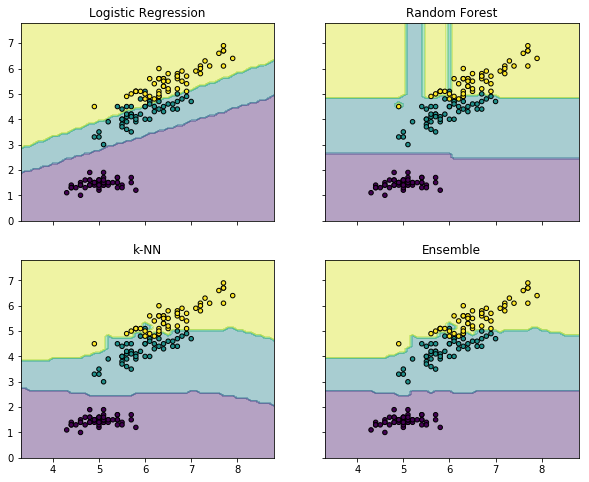

In [5]:
# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(random_state=42)
clf3 = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[2, 2, 1])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))
for idx, clf, tt in zip(([0, 0], [0, 1], [1, 0], [1, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Logistic Regression', 'Random Forest', 'k-NN', 'Ensemble']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## Bagging

Bagging is the process of only passing a subset to each base classifier. This can be advantageous when the data is excessively erroneous or noisy.

In [6]:
data = datasets.load_digits()
X, y = data.data, data.target
X = StandardScaler().fit_transform(X)
clf = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5, random_state=42)
scores = cross_val_score(estimator=clf,X=X,y=y,cv=10,scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), "Bagging"))

Accuracy: 0.95 (+/- 0.03) [Bagging]


## Boosting

Boosting classifiers build a complex classifier out of a number of very simple classifiers, typically a simple Decision Tree.

In [7]:
data = datasets.load_digits()
X, y = data.data, data.target
X = StandardScaler().fit_transform(X)

stump = DecisionTreeClassifier(max_depth=8, min_samples_leaf=5)
clf = AdaBoostClassifier(stump,n_estimators=100,learning_rate=0.1)
scores = cross_val_score(estimator=clf,X=X,y=y,cv=10,scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), "Boosting"))

Accuracy: 0.93 (+/- 0.03) [Boosting]


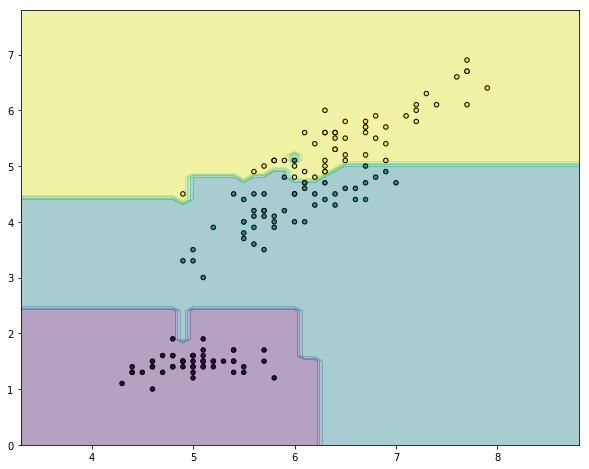

In [8]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
clf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
_, ax = plt.subplots(1, 1, figsize=(10, 8))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(X[:, 0], X[:, 1], c=y,s=20, edgecolor='k')
plt.show()

## Stacking

Finally, stacking is where we take base models and feed them into another model. You can think of this as a way of learning the optimal weights for an averaging ensemble.

In [9]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
X = StandardScaler().fit_transform(X)
y = LabelEncoder().fit_transform(y)

clf1 = LogisticRegression(random_state=42)
clf2 = SVC(random_state=42, probability=True)
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier(max_depth=1, criterion='entropy',random_state=0)
clf5 = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')

clfs = [clf1, clf2, clf3, clf4, clf5]
names = ["Logistic", "SVM", "NB", "Tree", "k-NN"]
for i, (clf, n) in enumerate(zip(clfs, names)):
    scores = cross_val_score(estimator=clf,X=X,y=y,cv=10,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), n))
    clf.fit(X, y)

def create_blend(clfs, X):
    output = np.empty((len(X), 0))
    for clf in clfs:
        y_pred = clf.predict_proba(X)
        output = np.append(output, y_pred, axis=1)
    return output
        
blend = create_blend(clfs, X)

second_clf = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
second_clf.fit(blend, y)
scores = cross_val_score(estimator=second_clf,X=blend,y=y,cv=10,scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), "Stacked"))

Accuracy: 0.87 (+/- 0.09) [Logistic]
Accuracy: 0.93 (+/- 0.06) [SVM]
Accuracy: 0.91 (+/- 0.08) [NB]
Accuracy: 0.67 (+/- 0.00) [Tree]
Accuracy: 0.92 (+/- 0.06) [k-NN]
Accuracy: 0.99 (+/- 0.02) [Stacked]


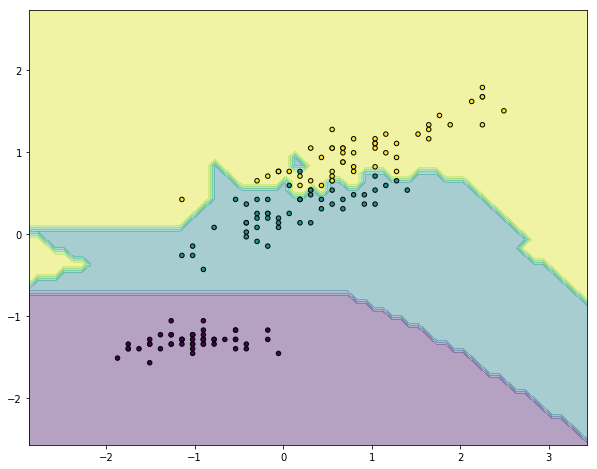

In [10]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
_, ax = plt.subplots(1, 1, figsize=(10, 8))
Z = second_clf.predict(create_blend(clfs, np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(X[:, 0], X[:, 1], c=y,s=20, edgecolor='k')
plt.show()

In [11]:
data = datasets.load_breast_cancer()
X, y = data.data, data.target
X = StandardScaler().fit_transform(X)

## Tasks

- Given the data above, try an ensemble technique. What is your highest accuracy?
  - Different ensembles
  - Different underlying models